## Data Preprocessing


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv('/content/Insurance Fraud - TRAIN-3000 (1).csv')
test = pd.read_csv('/content/Insurance Fraud -TEST-12900 (1).csv')

In [4]:
train.head()

,MONTH,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,...,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE_CLAIM,NUMBEROFCARS,YEAR,BASEPOLICY,FRAUDFOUND
0,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,...,26_to_30,No,No,External,3_to_5,no_change,1-vehicle,1994,Collision,Yes
1,Nov,5,Monday,Mazda,Urban,Wednesday,Dec,1,Male,Single,...,over_65,No,No,External,none,no_change,1-vehicle,1994,All_Perils,Yes
2,Jan,1,Monday,Pontiac,Urban,Wednesday,Jan,1,Male,Married,...,41_to_50,No,No,External,none,under_6_months,1-vehicle,1994,All_Perils,Yes
3,Dec,1,Monday,Toyota,Rural,Tuesday,May,3,Male,Married,...,36_to_40,No,No,External,more_than_5,under_6_months,2-vehicles,1994,All_Perils,Yes
4,Dec,5,Wednesday,Pontiac,Urban,Wednesday,Jan,1,Male,Single,...,36_to_40,No,No,External,more_than_5,no_change,1-vehicle,1994,Collision,Yes


In [5]:
# Seperate Feature and Target Variables

X_train = train.drop(columns=["FRAUDFOUND"])
y_train = train["FRAUDFOUND"]

X_test = test.drop(columns=["FRAUDFOUND"])
y_test = test["FRAUDFOUND"]

### Encoding

Types of encoding used:

1. Label Encoding:
  - Label encoding assigns each unique category a different integer value (e.g., Male=0, Female=1).

  - label encoding is used when the categorical feature has a natural ordering or ranking, like ratings (DRIVERRATING from 1 to 4).

  - Label encoding can also be useful when using tree-based models (e.g., Decision Trees, Random Forests) because these models can inherently handle ordinal relationships and don’t interpret the integers as continuous numerical values.

2. One-Hot Encoding:
  - One-hot encoding creates a binary column for each category (e.g., SEX becomes two columns: SEX_Male and SEX_Female).

  - one-hot encoding is used for nominal (unordered) categorical features where categories don’t have any intrinsic order, like MAKE (e.g., Acura, BMW, Chevrolet), SEX, MARITALSTATUS, ACCIDENTAREA, and VEHICLECATEGORY.

  - One-hot encoding works well for models that assume numerical inputs without an intrinsic hierarchy between them, like linear models or neural networks.

Why Both models have been used?
- Decision Tree and Random Forest classifiers can handle label-encoded features effectively, so if you want to simplify preprocessing, label encoding can work well.
- One-Hot Encoding may still yield better performance because it allows the model to treat each category as a distinct feature, which can help with interpretability and performance in some cases.
Recommended Approach
Apply Label Encoding to Ordered Features:
Features with an inherent order (e.g., DRIVERRATING, WEEKOFMONTH, AGEOFVEHICLE, DAYS_POLICY_ACCIDENT) should be label-encoded since each category has an ordinal relationship.
Apply One-Hot Encoding to Nominal (Unordered) Features:
For categorical features with no intrinsic order, like MAKE, SEX, MARITALSTATUS, POLICEREPORTFILED, WITNESSPRESENT, and AGENTTYPE, use one-hot encoding.

Summary:
- Label Encode: Use for features with an intrinsic order or ranking.
- One-Hot Encode: Use for unordered, nominal categorical features to improve interpretability and sometimes model performance.
For your dataset, given you are using tree-based models, either approach will work, but a combined approach based on feature type is likely the best practice for flexibility and interpretability.

Summary of Encoding Choices
- One-Hot Encoding for nominal (unordered) categorical features: MONTH, DAYOFWEEK, MAKE, DAYOFWEEKCLAIMED, MONTHCLAIMED, MARITALSTATUS, POLICYTYPE, VEHICLECATEGORY, BASEPOLICY.

- Label Encoding for binary features, ordered categorical features, and the target variable: WEEKOFMONTH, ACCIDENTAREA, WEEKOFMONTHCLAIMED, SEX, FAULT, VEHICLEPRICE, REPNUMBER, DRIVERRATING, DAYS_POLICY_ACCIDENT, DAYS_POLICY_CLAIM, PASTNUMBEROFCLAIMS, AGEOFVEHICLE, AGEOFPOLICYHOLDER, POLICEREPORTFILED, WITNESSPRESENT, AGENTTYPE, NUMBEROFSUPPLIMENTS, ADDRESSCHANGE_CLAIM, NUMBEROFCARS, FRAUDFOUND.

In [6]:
print(train.columns)

Index(['MONTH', 'WEEKOFMONTH', 'DAYOFWEEK', 'MAKE', 'ACCIDENTAREA',
       'DAYOFWEEKCLAIMED', 'MONTHCLAIMED', 'WEEKOFMONTHCLAIMED', 'SEX',
       'MARITALSTATUS', 'AGE', 'FAULT', 'POLICYTYPE', 'VEHICLECATEGORY',
       'VEHICLEPRICE', 'REPNUMBER', 'DEDUCTIBLE', 'DRIVERRATING',
       'DAYS_POLICY_ACCIDENT', 'DAYS_POLICY_CLAIM', 'PASTNUMBEROFCLAIMS',
       'AGEOFVEHICLE', 'AGEOFPOLICYHOLDER', 'POLICEREPORTFILED',
       'WITNESSPRESENT', 'AGENTTYPE', 'NUMBEROFSUPPLIMENTS',
       'ADDRESSCHANGE_CLAIM', 'NUMBEROFCARS', 'YEAR', 'BASEPOLICY',
       'FRAUDFOUND'],
      dtype='object')


In [7]:
# Use Label Encoding for the Target as it is a Binary Classification Problem

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [8]:
# Define the columns for one-hot and label encoding from the feature attributes

one_hot_cols = ['MONTH', 'DAYOFWEEK', 'MAKE', 'DAYOFWEEKCLAIMED', 'MONTHCLAIMED',
                       'MARITALSTATUS', 'POLICYTYPE', 'VEHICLECATEGORY', 'BASEPOLICY']
le_cols = ['WEEKOFMONTH', 'ACCIDENTAREA', 'WEEKOFMONTHCLAIMED', 'SEX', 'FAULT',
                     'VEHICLEPRICE', 'REPNUMBER', 'DRIVERRATING', 'DAYS_POLICY_ACCIDENT',
                     'DAYS_POLICY_CLAIM', 'PASTNUMBEROFCLAIMS', 'AGEOFVEHICLE',
                     'AGEOFPOLICYHOLDER', 'POLICEREPORTFILED', 'WITNESSPRESENT',
                     'AGENTTYPE', 'NUMBEROFSUPPLIMENTS', 'ADDRESSCHANGE_CLAIM',
                     'NUMBEROFCARS']

# Apply Label Encoding to Ordered/Binary Features


# Label encoding with combined categories from train and test
for col in le_cols:
    le = LabelEncoder()
    # Combine train and test to fit all possible values
    le.fit(list(X_train[col].values) + list(X_test[col].values))
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


# Apply One-Hot Encoding to Nominal/Unordered Features

X_train = pd.get_dummies(X_train, columns=one_hot_cols)
X_test = pd.get_dummies(X_test, columns=one_hot_cols)

We need to ensure that X_train and X_test have the same columns after one-hot encoding. This alignment is necessary because one-hot encoding can result in a different set of columns in the training and testing datasets due to differences in the categories present in each set.

</br>

Why Alignment Is Necessary After One-Hot Encoding?

- Different Categories in Train and Test Sets:
When we apply one-hot encoding to categorical variables, each unique category in a column becomes a new binary column.
If a category appears only in the training set but not in the test set (or vice versa), one-hot encoding will generate columns that exist in one set but not the other. This can lead to inconsistent column structures, causing errors during model training or prediction.</br>

 For example:

 Suppose the MAKE column in X_train has three car brands: Toyota, Ford, and BMW.
 If X_test has only two brands, Toyota and Ford, then the one-hot encoding will produce three columns in X_train (MAKE_Toyota, MAKE_Ford, MAKE_BMW) but only two columns in X_test (MAKE_Toyota, MAKE_Ford).

- Modeling Requirement:
Most machine learning algorithms require the training and test sets to have the same features (columns) with the same order.
If X_train and X_test have a different number of columns or mismatched columns after encoding, it will lead to errors when fitting or making predictions with the model.

- Ensuring Consistent Data Structure:
By aligning X_train and X_test, we make sure both have the same structure (same columns in the same order). If any column is missing in X_test, it’s added with a 0 value (or any other fill value you specify).
This also ensures that any columns in X_test that were not present in X_train are handled consistently (though in practice, it’s often only categories missing in X_test that need to be filled with 0).

In [9]:
# Align train and test sets to have the same columns after encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

## Hyperparameter Tuning

In [10]:
# Define the hyperparameter grid for each model

dt_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

rf_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40],
    "min_samples_leaf": [1, 2, 4]
}

In [11]:
# Randomized Search for Hyperparameter Tuning

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Random Search for Decision Tree

dt_rand = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=dt_grid,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42)

dt_rand.fit(X_train, y_train)

# Random Search for Random Forest

rf_rand = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_grid,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42)

rf_rand.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30, 40],
                                        'min_samples_leaf': [1, 2, 4],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [12]:
# Grid Search for Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Define Hyperparameters explicitly for Grid Search

# dt_param_grid = {
#     'max_depth': [None, 10, 20, 30, 40],
#     'min_samples_split': [2, 5, 10, 20],
#     'criterion': ['gini', 'entropy']
# }

# rf_param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30, 40],
#     "min_samples_leaf": [1, 2, 4]
# }

# Grid Search for Decision Trees

dt_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=dt_grid,
    cv=5,
    scoring='accuracy')

dt_grid_search.fit(X_train, y_train)

# Grid Search for Random Forest

rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=rf_grid,
    cv=5,
    scoring='accuracy')

rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [13]:
# prompt: install scikit optimize

!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.9 MB/s eta 0:00:00


In [14]:
# use Bayesian optimization to efficiently search the parameter space

from skopt import BayesSearchCV

# Define Hyperparameters explicitly for Bayes Search

# dt_param_grid = {
#     'max_depth': [None, 10, 20, 30, 40],
#     'min_samples_split': [2, 5, 10, 20],
#     'criterion': ['gini', 'entropy']
# }

# rf_param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30, 40],
#     "min_samples_leaf": [1, 2, 4]
# }

# Bayes Search for Decision Trees

dt_bayes_search = BayesSearchCV(
    estimator=DecisionTreeClassifier(),
    search_spaces=dt_grid,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42)

dt_bayes_search.fit(X_train, y_train)

# Bayes Search for Random Forest

rf_bayes_search = BayesSearchCV(
    estimator=RandomForestClassifier(),
    search_spaces=rf_grid,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42)

rf_bayes_search.fit(X_train, y_train)

BayesSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=10,
              random_state=42, scoring='accuracy',
              search_spaces={'max_depth': [None, 10, 20, 30, 40],
                             'min_samples_leaf': [1, 2, 4],
                             'n_estimators': [50, 100, 200]})

In [15]:
# Compare Best Parameters from each Search Method

# For Decision Trees

print("Best Parameters for Decision Tree (Random Search):", dt_rand.best_params_)
print("Best Parameters for Decision Tree (Grid Search):", dt_grid_search.best_params_)
print("Best Parameters for Decision Tree (Bayes Search):", dt_bayes_search.best_params_)

# For Random Forest

print("Best Parameters for Random Forest (Random Search):", rf_rand.best_params_)
print("Best Parameters for Random Forest (Grid Search):", rf_grid_search.best_params_)
print("Best Parameters for Random Forest (Bayes Search):", rf_bayes_search.best_params_)

Best Parameters for Decision Tree (Random Search): {'min_samples_split': 10, 'max_depth': 10, 'criterion': 'entropy'}
Best Parameters for Decision Tree (Grid Search): {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Best Parameters for Decision Tree (Bayes Search): OrderedDict([('criterion', 'entropy'), ('max_depth', 20), ('min_samples_split', 10)])
Best Parameters for Random Forest (Random Search): {'n_estimators': 200, 'min_samples_leaf': 2, 'max_depth': 40}
Best Parameters for Random Forest (Grid Search): {'max_depth': 40, 'min_samples_leaf': 2, 'n_estimators': 200}
Best Parameters for Random Forest (Bayes Search): OrderedDict([('max_depth', 20), ('min_samples_leaf', 4), ('n_estimators', 200)])


## Model Training and Validation

In [16]:
# Model Building

# For Decision Trees
dt_model_random = DecisionTreeClassifier(**dt_rand.best_params_)
dt_model_grid = DecisionTreeClassifier(**dt_grid_search.best_params_)
dt_model_bayes = DecisionTreeClassifier(**dt_bayes_search.best_params_)

# For Random Forests

rf_model_random = RandomForestClassifier(**rf_rand.best_params_)
rf_model_grid = RandomForestClassifier(**rf_grid_search.best_params_)
rf_model_bayes = RandomForestClassifier(**rf_bayes_search.best_params_)

In [17]:
# Model Training

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}

def evaluate_model(model, name):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[name] = {
      'Accuracy': accuracy_score(y_test, y_pred),
      'Precision': precision_score(y_test, y_pred, pos_label= 1),
      'Recall': recall_score(y_test, y_pred, pos_label= 1),
      'F1 Score': f1_score(y_test, y_pred, pos_label= 1)
  }

evaluate_model(dt_model_random, 'Decision Tree (Random Search)')
evaluate_model(dt_model_grid, 'Decision Tree (Grid Search)')
evaluate_model(dt_model_bayes, 'Decision Tree (Bayes Search)')

evaluate_model(rf_model_random, 'Random Forest (Random Search)')
evaluate_model(rf_model_grid, 'Random Forest (Grid Search)')
evaluate_model(rf_model_bayes, 'Random Forest (Bayes Search)')

for model_name, metrics in results.items():
  print(f"{model_name}:")
  for metric_name, value in metrics.items():
    print(f"   {metric_name}: {value * 100:.2f}%")
  print()

Decision Tree (Random Search):
   Accuracy: 92.24%
   Precision: 20.19%
   Recall: 34.34%
   F1 Score: 25.43%

Decision Tree (Grid Search):
   Accuracy: 92.21%
   Precision: 20.12%
   Recall: 34.34%
   F1 Score: 25.37%

Decision Tree (Bayes Search):
   Accuracy: 89.56%
   Precision: 22.42%
   Recall: 69.48%
   F1 Score: 33.90%

Random Forest (Random Search):
   Accuracy: 95.14%
   Precision: 39.94%
   Recall: 51.81%
   F1 Score: 45.10%

Random Forest (Grid Search):
   Accuracy: 95.29%
   Precision: 41.04%
   Recall: 50.60%
   F1 Score: 45.32%

Random Forest (Bayes Search):
   Accuracy: 94.60%
   Precision: 28.87%
   Recall: 27.31%
   F1 Score: 28.07%



## Model Improvement

### Handling Class Imbalance:
</b> Dataset is imbalanced, with far fewer fraud cases than non-fraud cases. This imbalance has lead to model achieving high accuracy by simply predicting the majority class but missing fraudulent cases.

Approach:
</b>
- SMOTE (Synthetic Minority Over-sampling Technique): Generates synthetic samples for the minority class to balance the dataset.

 </b>
- Use Class Weights: In tree-based models like Decision Trees or Random Forests, you can specify `class_weight='balanced'` to give more importance to the minority class.

 </b>
- Gradient Boosting Models: Models like XGBoost, LightGBM, or CatBoost are powerful tree-based models that often perform well on structured data like fraud detection datasets. These models are designed to handle complex patterns and often provide better performance than traditional Random Forests. `scale_pos_weight` parameter helps balance classes by assigning more weight to the minority class, especially helpful for highly imbalanced datasets.

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [19]:
# Hyperparameter Tuning with Randomized Search for Random Forest

rf_param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=30,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# Fit the model on the resampled training data
rf_random_search.fit(X_resampled, y_resampled)

# Store the best model from Randomized Search
rf_best_model = rf_random_search.best_estimator_
print("Best Random Forest Parameters from Randomized Search:", rf_random_search.best_params_)

Best Random Forest Parameters from Randomized Search: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20}


In [20]:
# Train an XGBoost Model with Class Imbalance Adjustment

from xgboost import XGBClassifier

# Calculate scale_pos_weight for XGBoost to balance classes
scale_pos_weight = len(y_resampled[y_resampled == 0]) / len(y_resampled[y_resampled == 1])

# Initialize XGBoost model with class imbalance adjustment
xgb_model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Fit the model on resampled training data
xgb_model.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:30:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [21]:
# Define an Evaluation Function with Additional Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc

# Results dictionary to store metrics
results = {}

# Update the evaluation function to include additional metrics
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability for ROC-AUC and PR-AUC

    # Calculate metrics and store results
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred) * 100,
        'Precision': precision_score(y_test, y_pred) * 100,
        'Recall': recall_score(y_test, y_pred) * 100,
        'F1 Score': f1_score(y_test, y_pred) * 100,
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba) * 100
    }

    # Precision-Recall AUC
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    results[name]['PR-AUC'] = auc(recall, precision) * 100

# Evaluate both Random Forest (best from Randomized Search) and XGBoost
evaluate_model(rf_best_model, 'Random Forest (Best Random Search)')
evaluate_model(xgb_model, 'XGBoost')

In [22]:
# Threshold Adjustment for Improved Recall or Precision

# Define a function to evaluate a model with a custom threshold
def evaluate_with_custom_threshold(model, threshold=0.5):
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability predictions
    y_pred_custom = (y_pred_proba >= threshold).astype(int)  # Apply custom threshold

    # Print evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_custom) * 100
    precision = precision_score(y_test, y_pred_custom) * 100
    recall = recall_score(y_test, y_pred_custom) * 100
    f1 = f1_score(y_test, y_pred_custom) * 100
    print(f"Custom Threshold {threshold} - Accuracy: {accuracy:.2f}%, Precision: {precision:.2f}%, Recall: {recall:.2f}%, F1 Score: {f1:.2f}%")

# Example: Evaluate Random Forest with a custom threshold of 0.4
evaluate_with_custom_threshold(rf_best_model, threshold=0.4)


Custom Threshold 0.4 - Accuracy: 84.94%, Precision: 17.51%, Recall: 78.31%, F1 Score: 28.62%


In [23]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation to evaluate model robustness
cv_scores = cross_val_score(rf_best_model, X_resampled, y_resampled, cv=5, scoring='f1')
print(f"Cross-Validated F1 Score: {cv_scores.mean():.2f}%")

Cross-Validated F1 Score: 0.91%


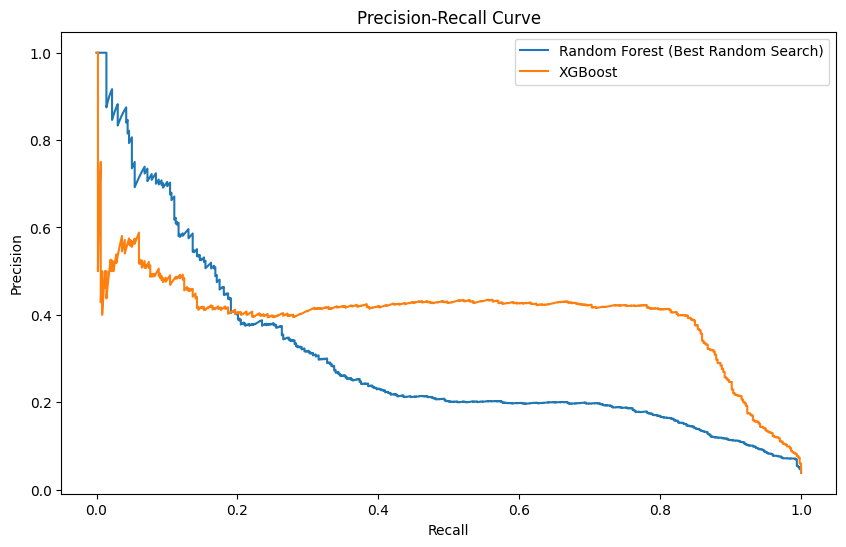

In [24]:
import matplotlib.pyplot as plt

# Precision-Recall curve for Random Forest (Best Random Search)
y_pred_proba_rf = rf_best_model.predict_proba(X_test)[:, 1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)

# Precision-Recall curve for XGBoost
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb)

# Plot Precision-Recall Curves
plt.figure(figsize=(10, 6))
plt.plot(recall_rf, precision_rf, label='Random Forest (Best Random Search)')
plt.plot(recall_xgb, precision_xgb, label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [25]:
# Print results for each model
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"   {metric_name}: {value:.2f}%")
    print()  # Blank line for readability between models

Random Forest (Best Random Search):
   Accuracy: 90.00%
   Precision: 20.15%
   Recall: 53.82%
   F1 Score: 29.32%
   ROC-AUC: 89.09%
   PR-AUC: 29.97%

XGBoost:
   Accuracy: 91.43%
   Precision: 29.52%
   Recall: 88.15%
   F1 Score: 44.23%
   ROC-AUC: 95.00%
   PR-AUC: 39.91%



In [26]:
from skopt.space import Real, Integer

# Define hyperparameter space for Bayesian Optimization
xgb_param_space = {
    'n_estimators': Integer(100, 400),
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.2, 'log-uniform'),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0)
}

# Set up BayesSearchCV
bayes_search_xgb = BayesSearchCV(
    estimator=XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    search_spaces=xgb_param_space,
    n_iter=30,  # Number of parameter configurations to sample
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

# Fit Bayesian Optimization on the resampled training data
bayes_search_xgb.fit(X_resampled, y_resampled)

# Retrieve the best estimator
xgb_bayes_best = bayes_search_xgb.best_estimator_
print("Best parameters from BayesSearchCV:", bayes_search_xgb.best_params_)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:32:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters from BayesSearchCV: OrderedDict([('colsample_bytree', 0.6), ('learning_rate', 0.018555903369526366), ('max_depth', 10), ('n_estimators', 100), ('subsample', 0.6)])


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to evaluate the model with a custom threshold
def evaluate_with_threshold(model, threshold=0.6):
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability scores for the positive class
    y_pred_custom = (y_pred_proba >= threshold).astype(int)  # Apply custom threshold

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_custom) * 100
    precision = precision_score(y_test, y_pred_custom) * 100
    recall = recall_score(y_test, y_pred_custom) * 100
    f1 = f1_score(y_test, y_pred_custom) * 100
    print(f"Threshold {threshold:.2f} - Accuracy: {accuracy:.2f}%, Precision: {precision:.2f}%, Recall: {recall:.2f}%, F1 Score: {f1:.2f}%")

# Evaluate XGBoost with different thresholds
for threshold in [0.3, 0.4, 0.5, 0.6, 0.7]:
    evaluate_with_threshold(xgb_bayes_best, threshold=threshold)


Threshold 0.30 - Accuracy: 71.20%, Precision: 10.97%, Recall: 90.96%, F1 Score: 19.58%
Threshold 0.40 - Accuracy: 84.12%, Precision: 17.25%, Recall: 82.13%, F1 Score: 28.51%
Threshold 0.50 - Accuracy: 89.72%, Precision: 21.61%, Recall: 63.45%, F1 Score: 32.24%
Threshold 0.60 - Accuracy: 92.61%, Precision: 23.40%, Recall: 40.36%, F1 Score: 29.62%
Threshold 0.70 - Accuracy: 95.16%, Precision: 32.88%, Recall: 24.50%, F1 Score: 28.08%


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# Initialize base models
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, **rf_random_search.best_params_)
xgb_model = xgb_bayes_best

# Define stacking ensemble with Logistic Regression as meta-model
stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model)],
    final_estimator=LogisticRegression(),
    cv=5
)

# Fit stacking model on resampled data
stacking_model.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:32:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:32:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:32:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:32:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:32:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=20,
                                                       min_samples_leaf=4,
                                                       min_samples_split=10,
                                                       n_estimators=200,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.6, device=None,
                                              early_stopping_rounds=None,
                                              ena...
                                              interaction_constraints=None,
                                              learning_rate=0.018555903369526366,
                                              max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=10,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

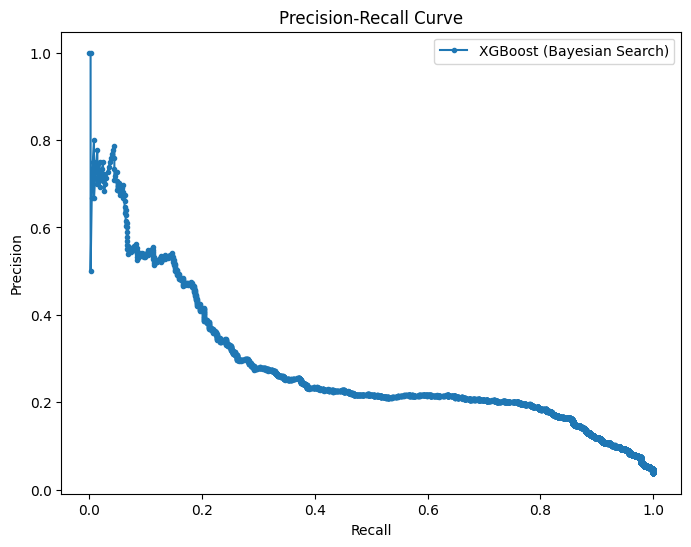

In [30]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve for XGBoost
y_pred_proba = xgb_bayes_best.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='XGBoost (Bayesian Search)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [31]:
from sklearn.model_selection import cross_val_score

# Cross-validation on the best XGBoost model
cv_scores = cross_val_score(xgb_bayes_best, X_resampled, y_resampled, cv=5, scoring='f1')
print(f"Cross-Validated F1 Score for XGBoost (Bayesian Search): {cv_scores.mean():.2f}%")

# Cross-validation on the stacking model
cv_scores_stack = cross_val_score(stacking_model, X_resampled, y_resampled, cv=5, scoring='f1')
print(f"Cross-Validated F1 Score for Stacking Model: {cv_scores_stack.mean():.2f}%")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:32:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:32:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:32:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:32:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:32:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-Validated F1 Score for XGBoost (Bayesian Search): 0.91%


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:33:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:33:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:33:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:33:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:33:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-Validated F1 Score for Stacking Model: 0.90%


In [32]:
from sklearn.metrics import roc_auc_score, auc

# Dictionary to store results
results = {}

def evaluate_model(model, name):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    roc_auc = roc_auc_score(y_test, y_pred_proba) * 100

    # Precision-Recall AUC
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall_vals, precision_vals) * 100

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc,
        'PR-AUC': pr_auc
    }

# Evaluate XGBoost, Stacking model, and any other models
evaluate_model(xgb_bayes_best, 'XGBoost (Bayesian Search)')
evaluate_model(stacking_model, 'Stacking Model (XGBoost + Random Forest)')

# Display all metrics for each model
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"   {metric_name}: {value:.2f}%")
    print()

XGBoost (Bayesian Search):
   Accuracy: 89.72%
   Precision: 21.61%
   Recall: 63.45%
   F1 Score: 32.24%
   ROC-AUC: 89.36%
   PR-AUC: 28.32%

Stacking Model (XGBoost + Random Forest):
   Accuracy: 89.29%
   Precision: 20.28%
   Recall: 60.64%
   F1 Score: 30.40%
   ROC-AUC: 89.35%
   PR-AUC: 30.36%



In [38]:
from sklearn.calibration import CalibratedClassifierCV

# Calibrate the XGBoost model's probabilities
calibrated_xgb = CalibratedClassifierCV(estimator=xgb_bayes_best_with_reg, method='isotonic', cv=5)
calibrated_xgb.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:38:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:38:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:38:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:38:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

CalibratedClassifierCV(cv=5,
                       estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=0.844238919178303,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric='logloss',
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.01, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=10, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=340, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=42, ...),
                       method='isotonic')

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc

# Predict probabilities and binary outcomes using the calibrated model
y_pred_proba_calibrated = calibrated_xgb.predict_proba(X_test)[:, 1]
y_pred_calibrated = (y_pred_proba_calibrated >= 0.5).astype(int)  # Adjust threshold if needed

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_calibrated) * 100
precision = precision_score(y_test, y_pred_calibrated) * 100
recall = recall_score(y_test, y_pred_calibrated) * 100
f1 = f1_score(y_test, y_pred_calibrated) * 100
roc_auc = roc_auc_score(y_test, y_pred_proba_calibrated) * 100

# Precision-Recall AUC
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba_calibrated)
pr_auc = auc(recall_vals, precision_vals) * 100

# Print metrics
print(f"Calibrated XGBoost Model - Metrics:")
print(f"   Accuracy: {accuracy:.2f}%")
print(f"   Precision: {precision:.2f}%")
print(f"   Recall: {recall:.2f}%")
print(f"   F1 Score: {f1:.2f}%")
print(f"   ROC-AUC: {roc_auc:.2f}%")
print(f"   PR-AUC: {pr_auc:.2f}%")

Calibrated XGBoost Model - Metrics:
   Accuracy: 93.09%
   Precision: 27.32%
   Recall: 47.79%
   F1 Score: 34.77%
   ROC-AUC: 88.17%
   PR-AUC: 27.96%


`IsolationForest` is used to identify and isolate outliers or anomalous cases in a dataset, which are assumed to represent potential fraud. By training a separate XGBoost model on only these anomalies, the model becomes specifically focused on detecting fraud patterns, improving its effectiveness in fraud detection.

focusing on anomalies through IsolationForest and then training a specialized model like calibrated XGBoost on these isolated cases is often done to address issues related to low precision in anomaly detection tasks, such as fraud detection.

Why this approach helps improve precision?
- Imbalanced Data: In many anomaly detection tasks, especially fraud detection, anomalies (fraud cases) are extremely rare compared to normal cases. This class imbalance often causes models to be biased towards normal cases, resulting in low precision (a high number of false positives) when identifying fraud.

- Precision vs. Recall Trade-off: Models trained on the entire dataset may achieve high recall (catching most fraud cases) but often at the expense of precision, meaning they incorrectly classify many normal cases as fraudulent. This can lead to a high false positive rate, which is inefficient and costly.

- Targeted Training on Anomalies: By isolating the anomalies first, we ensure that the XGBoost model is trained specifically on features and patterns present in the fraudulent cases, making it better at identifying true frauds without mistaking too many normal cases as fraudulent.
 </br>This targeted approach helps improve the model’s precision by:
 - Reducing False Positives: Focusing only on the anomalies means the model learns more nuanced patterns specific to fraud, which helps reduce the misclassification of normal cases as fraud.

 - Reducing Dilution: Training on the full dataset would dilute the anomaly patterns with normal data patterns. By filtering the data to include only anomalies, we ensure the model isn't overwhelmed by normal cases, leading to more precise anomaly detection.

- Efficient Use of Resources: In practical applications like fraud detection, high precision is critical because investigating false positives is costly and time-consuming. A precise model minimizes unnecessary checks while still effectively identifying potential fraud cases.


In [40]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit on training data
iso_forest.fit(X_train)

# Get anomaly scores and classify anomalies as -1 (outlier) and 1 (inlier)
anomaly_labels = iso_forest.predict(X_train)

# Filter out normal cases to focus on potential fraud cases
X_train_anomalies = X_train[anomaly_labels == -1]
y_train_anomalies = y_train[anomaly_labels == -1]

# Apply this pre-processing step to both training and test sets before feeding into XGBoost
X_test_anomalies = X_test[iso_forest.predict(X_test) == -1]

# Retrain XGBoost model on the filtered data
xgb_bayes_best_with_reg.fit(X_train_anomalies, y_train_anomalies)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:45:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.844238919178303, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=340, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [42]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.0 MB/s eta 0:00:00


In [43]:
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

# Initialize individual models
lgbm_model = LGBMClassifier(random_state=42)
catboost_model = CatBoostClassifier(verbose=0, random_state=42)

# Define the stacking ensemble
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_bayes_best_with_reg),
        ('lgbm', lgbm_model),
        ('catboost', catboost_model)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

# Train the stacking model on the anomaly-filtered data
stacking_model.fit(X_train_anomalies, y_train_anomalies)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:46:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 52, number of negative: 248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 300, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.173333 -> initscore=-1.562185
[LightGBM] [Info] Start training from score -1.562185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:46:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:46:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:46:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:47:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:47:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[LightGBM] [Info] Number of positive: 41, number of negative: 199
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.170833 -> initscore=-1.579733
[LightGBM] [Info] Start training from score -1.579733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


StackingClassifier(cv=5,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.844238919178303,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_con...
                                              max_delta_step=None, max_depth=10,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=340, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('lgbm', LGBMClassifier(random_state=42)),
                               ('catboost',
                                <catboost.core.CatBoostClassifier object at 0x7f7727fb8490>)],
                   final_estimator=LogisticRegression())

In [45]:
# Predict anomalies on the test set using Isolation Forest
anomaly_labels_test = iso_forest.predict(X_test)

# Filter both X_test and y_test to keep only the samples labeled as anomalies (-1)
X_test_anomalies = X_test[anomaly_labels_test == -1]
y_test_anomalies = y_test[anomaly_labels_test == -1]

# Now evaluate the stacking model on the filtered X_test_anomalies and y_test_anomalies
y_pred_proba_stack = stacking_model.predict_proba(X_test_anomalies)[:, 1]
y_pred_stack = (y_pred_proba_stack >= 0.5).astype(int)  # Adjust threshold if needed

# Calculate evaluation metrics with the filtered y_test_anomalies
accuracy = accuracy_score(y_test_anomalies, y_pred_stack) * 100
precision = precision_score(y_test_anomalies, y_pred_stack) * 100
recall = recall_score(y_test_anomalies, y_pred_stack) * 100
f1 = f1_score(y_test_anomalies, y_pred_stack) * 100
roc_auc = roc_auc_score(y_test_anomalies, y_pred_proba_stack) * 100

# Precision-Recall AUC
precision_vals, recall_vals, _ = precision_recall_curve(y_test_anomalies, y_pred_proba_stack)
pr_auc = auc(recall_vals, precision_vals) * 100

# Print metrics
print(f"Stacking Model (XGBoost + LightGBM + CatBoost) - Metrics:")
print(f"   Accuracy: {accuracy:.2f}%")
print(f"   Precision: {precision:.2f}%")
print(f"   Recall: {recall:.2f}%")
print(f"   F1 Score: {f1:.2f}%")
print(f"   ROC-AUC: {roc_auc:.2f}%")
print(f"   PR-AUC: {pr_auc:.2f}%")

Stacking Model (XGBoost + LightGBM + CatBoost) - Metrics:
   Accuracy: 97.10%
   Precision: 67.69%
   Recall: 69.84%
   F1 Score: 68.75%
   ROC-AUC: 95.67%
   PR-AUC: 73.36%


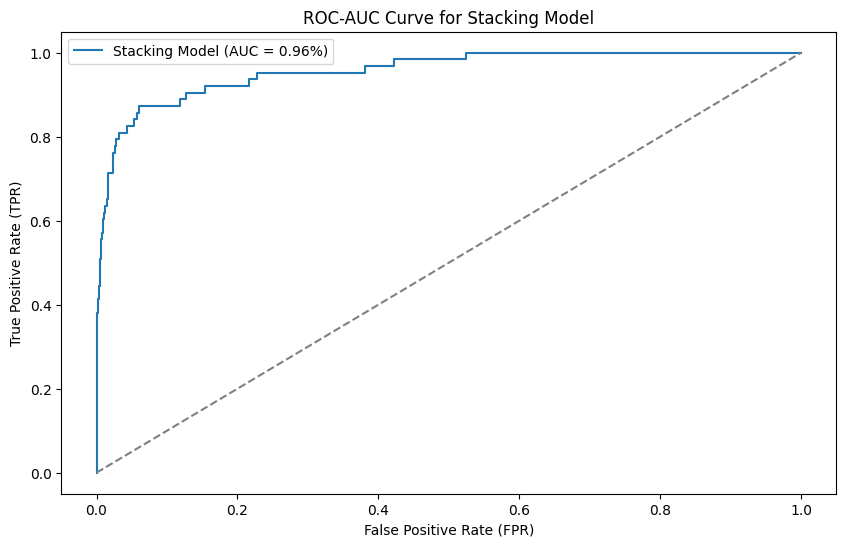

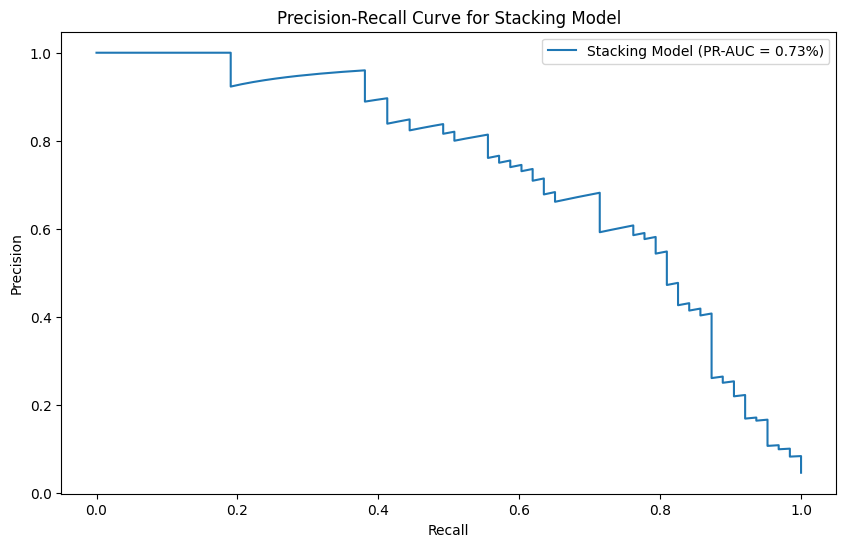

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Generate predictions and probabilities with the filtered test set
y_pred_proba_stack = stacking_model.predict_proba(X_test_anomalies)[:, 1]

# Generate ROC curve values
fpr, tpr, _ = roc_curve(y_test_anomalies, y_pred_proba_stack)
roc_auc = auc(fpr, tpr)

# Plot ROC-AUC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Stacking Model (AUC = {roc_auc:.2f}%)')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-AUC Curve for Stacking Model')
plt.legend()
plt.show()

# Generate Precision-Recall curve values
precision_vals, recall_vals, _ = precision_recall_curve(y_test_anomalies, y_pred_proba_stack)
pr_auc = auc(recall_vals, precision_vals)

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, label=f'Stacking Model (PR-AUC = {pr_auc:.2f}%)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Stacking Model')
plt.legend()
plt.show()